<a href="https://colab.research.google.com/github/noorhaq/Google_Colab/blob/master/Handwritten_Number_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [21]:
callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()


4


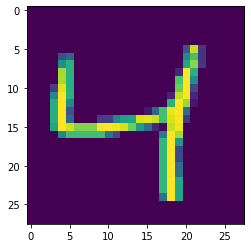

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2]) #To show image
#print(x_train[0])
print(y_train[2])
##To see the pixels and colors of the images and labels

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9766


[0.0771845355629921, 0.9765999913215637]

[3.3832603e-12 2.7064018e-10 4.6898784e-08 6.5356849e-09 9.9987078e-01
 2.0895502e-07 2.1394226e-09 2.8383211e-05 9.3328403e-05 7.2237513e-06]
4


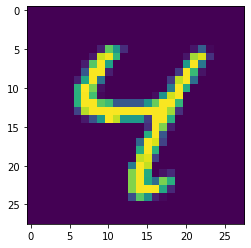

In [32]:
classifications = model.predict(x_test)
plt.imshow(x_test[6]) #To show image
print(classifications[6])
print(y_test[6])